In [382]:
# Import useful libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
from scipy.stats import norm
from scipy.special import erf
from scipy.optimize import curve_fit
from scipy.integrate import quad
import math

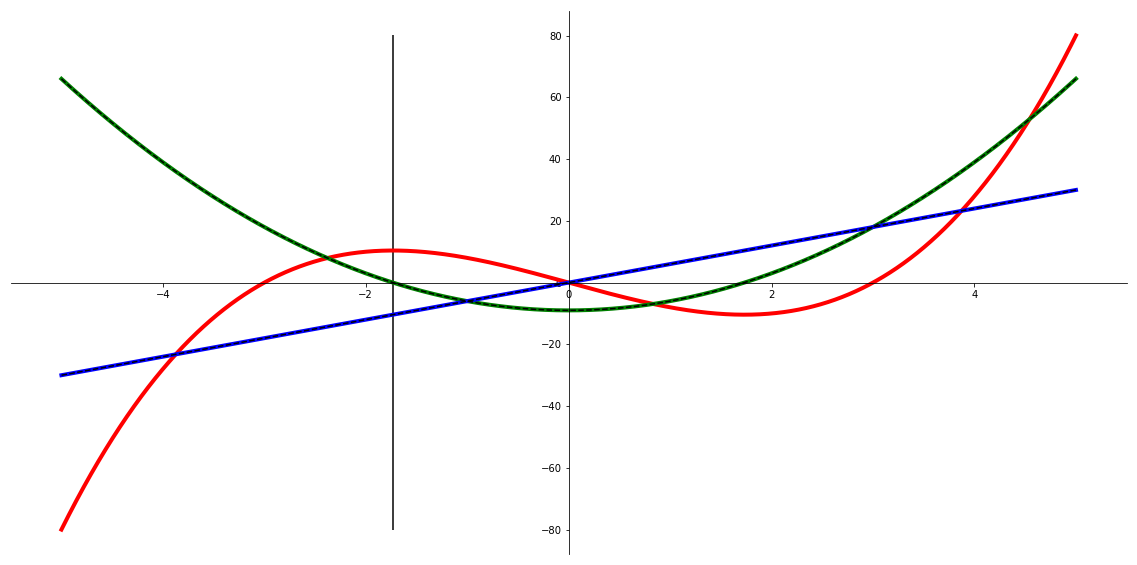

[-1.73214057] [ -8.97638357e-05]


In [330]:
#define testing function
def q(x):
    return(x**3 - 9*x)
#create test arrays with variable size
step=0.001
x=np.arange(-5,5+step,step)
y=q(x)

#define differentiation function
def grad(x,y):
    l=len(x)
    step=x[1]-x[0]
    dx=np.linspace(x.min()+step/2.,x.max()-step/2.,l-1)    #create array of points halfway between each original x value
    dy=[]
    for i in range(l-1):        
        dy.append((y[i]-y[i+1])/(x[i]-x[i+1]))    #calculate gradient between each pair of x,y values
    dy=np.array(dy)
    return(dx,dy)

#define peak finding function
def find(x,y,n=100000,filt=0.5,find_x=True,find_y=False):                        #specify default size of n for reasonable speed runs
    
    
    
    x_int = np.linspace(x.min(),x.max(),n)    #create x-array of size n
    interp = interp1d(x,y,kind='cubic')
    y_int = interp(x_int)
    dx,dy=grad(x_int,y_int)
    dx_int = np.linspace(dx.min(),dx.max(),n)    #create x-array of size n
    dinterp = interp1d(dx,dy,kind='cubic')
    dy_int = dinterp(dx_int)                     #create y-array smoothly interpolated
    r=np.where(np.diff(np.sign(dy_int))!=0)*1  #find indices of y_int where the value changes sign
    r=r[0]    
    d2x,d2y=grad(dx_int,dy_int)                   #differentiate arrays
    d2x_int = np.linspace(d2x.min(),d2x.max(),n)
    d2_interp = interp1d(d2x,d2y,kind='cubic')
    d2y_int = d2_interp(d2x_int)                 #repeat interpolation steps
    peaks_x,peaks_y=[],[]
    y_max_list=y_int[r]
    for i in r:
        if d2y_int[i]<0 and y_int[i] >= filt*y_max_list.max():                       #as y_int and dy_int are the same size, dy_int[i] is the gradient of y at y_int[i]
            peaks_x.append(x_int[i])                            #record x position of the peak
            peaks_y.append(y_int[i])
    peaks_x=np.array(peaks_x)
    peaks_y=np.array(peaks_y)
    if find_x==True and find_y==False:
        return(peaks_x)
    elif find_y==True and find_x==False:
        return(peaks_y)
    elif find_x==True and find_y==True:
        return(peaks_x,peaks_y)
    else:
        raise ValueError("Select an output")
    

#calcuate gradients and peaks
dx,dy=grad(x,q(x))
d2x,d2y=grad(dx,dy)
peaks=find(x,y)

#plot example functions and manually differantiated gradients
fig,ax=plt.subplots(figsize=(20,10))
ax.plot(x,y,'r',lw=4)
ax.plot(x,3*x**2 -9 ,'g',lw=4)
ax.plot(x,6*x,'b',lw=4)

#plot funtion differentiated gradients
ax.plot(dx,dy,'k--')
ax.plot(d2x,d2y,'k--')

#mark peak
ax.vlines(peaks,y.min(),y.max())

#plot formatting
ax.spines['top'].set_visible(0)
ax.spines['right'].set_visible(0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
plt.show()

#print peak x-value and the difference between found peak and known solution
print(peaks, peaks+np.sqrt(3))

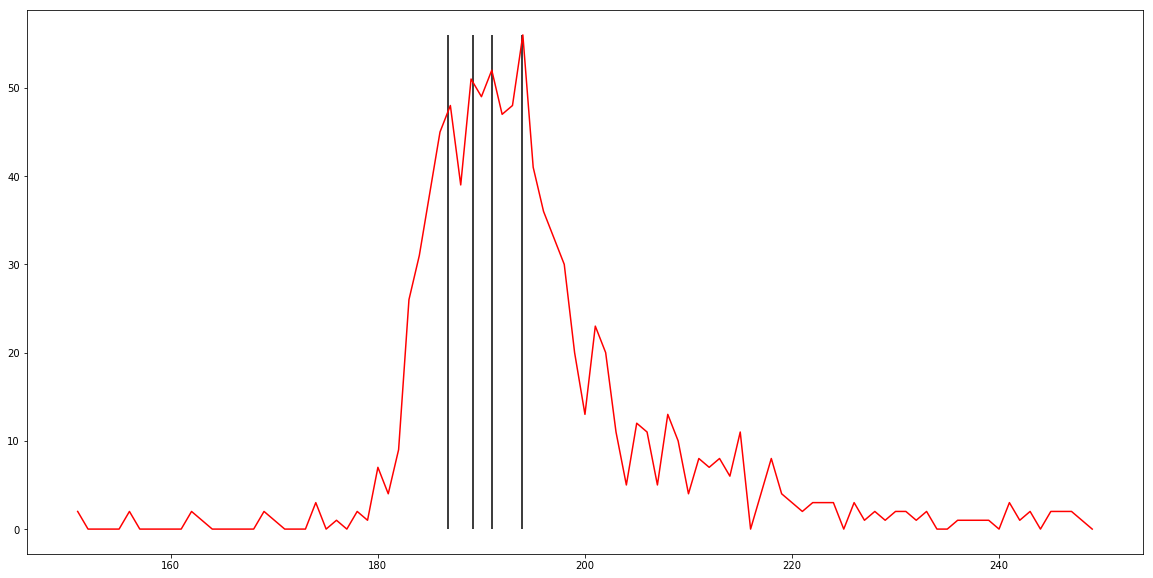

In [3]:
#define easy subset function
def sub(x,y,low,upp):
    return(x[(x>low)&(x<upp)],y[(x>low)&(x<upp)])

#load data and reduce to first peak
x,y=np.loadtxt("C14_1_10Dil_ex1.csv",delimiter=",",unpack=1)
x,y=sub(x,y,150,250)

#calcuate gradients and peaks
peaks=find(x,y)

#plot
fig,ax=plt.subplots(figsize=(20,10))
ax.plot(x,y,'r')
#ax.plot(dx,dy,'k--')
#ax.plot(d2x,d2y,'k--')

ax.vlines(peaks,y.min(),y.max())

plt.show()

In [74]:
def gauss(x,u=0,s=1):
    return(np.exp(-((x-u)**2)/(2*s**2)))

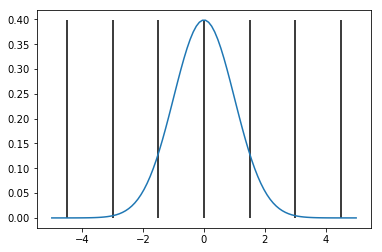

In [124]:
fig,ax=plt.subplots()
w=5
s=1.5
c=3
x=(np.linspace(-w,w,100))
y=norm.pdf(x)
ax.plot(x,y)
ax.vlines(np.linspace(-c*s,c*s,2*c+1),0,y.max())
plt.show()

0.398942280401
[0.3989422804014327, 0.24197072451914337, 0.053990966513188063, 0.0044318484119380075]


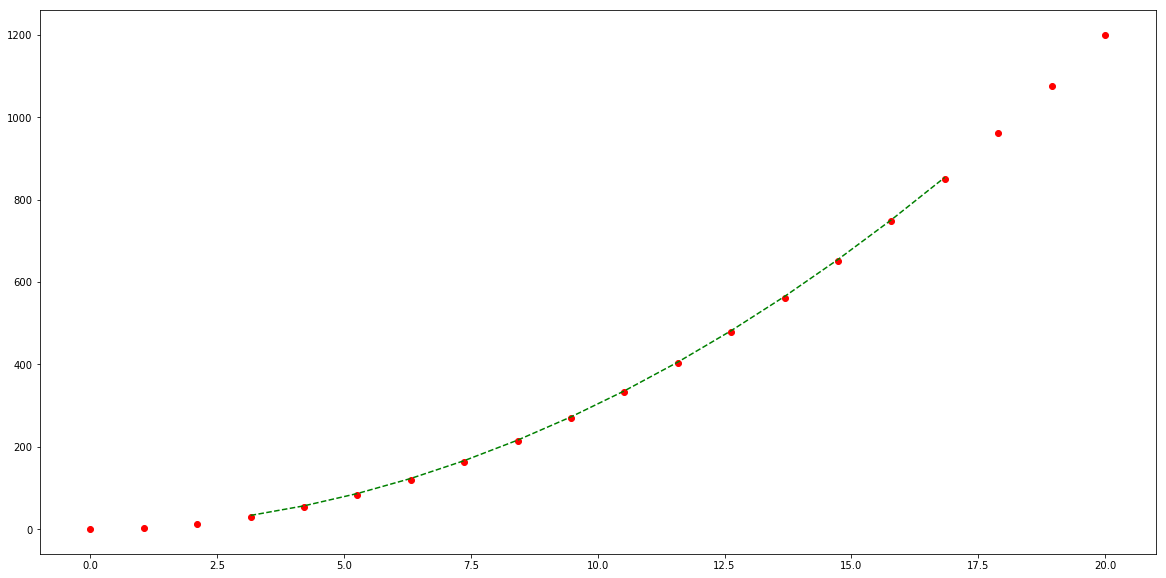

In [224]:
x=np.linspace(0,20,20)
y=3*x**2
print(norm.pdf(0))
x2,y2=gbox(x,y,1)
fig,ax=plt.subplots(figsize=(20,10))
ax.plot(x,y,'ro')
ax.plot(x2,y2,'g--')
plt.show()

-20 100 120
100 100


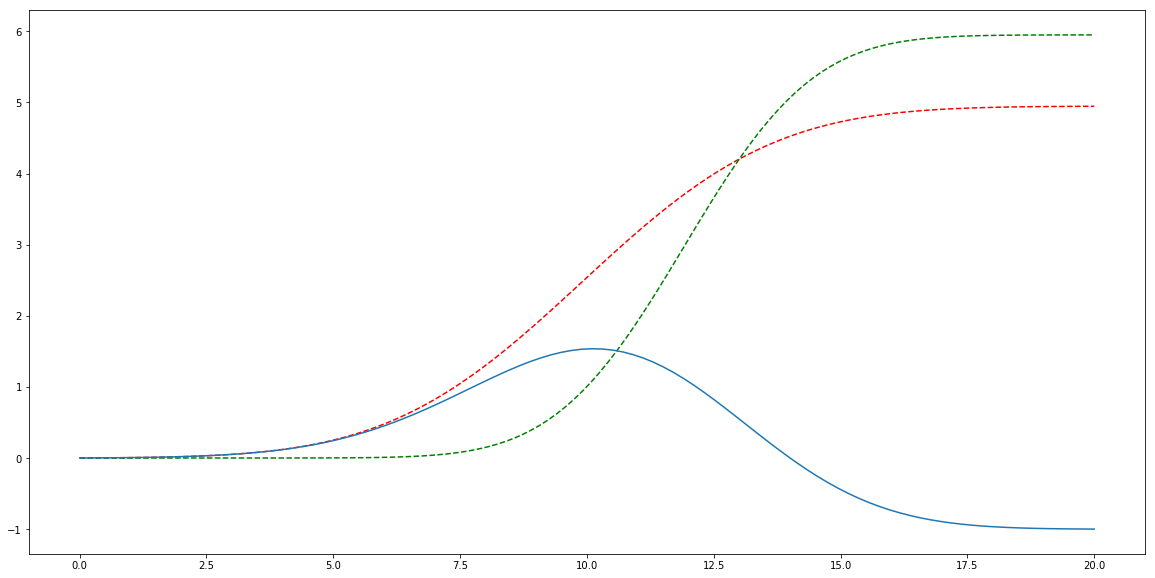

In [243]:
def box(x,y,w=3):
    l=len(x)
    x2=np.linspace(x[w],x[l-(w+1)],(l-2*w))
    #print(x,x2)
    y2=[]
    for i in range(len(x2)):
        #print(i,x2[i],y[i],y[i+2*w])
        y2.append(np.mean(y[i:i+2*w+1]))
    y2=np.array(y2)
    return(x2,y2)
    
    
    


def chi(y,y2):
    l=len(y)
    w=int(((len(y)-len(y2))/2))
    y=(y[w:l-w])
    c=sum(((y-y2)**2)/y.std()**2)
    return(c)


def gbox(x,y,sigma=1):
    w=math.ceil(3*sigma)
    g0=[]
    for i in range(w+1):
        g0.append(norm.pdf(i,scale=sigma))
    l=len(x)
    x2=np.linspace(x[w],x[l-(w+1)],(l-2*w))
    y2=[]
    for i in range(len(x2)):
        t=0
        for j in range(-w,w+1):
            t+=(y[i+w+j]*g0[abs(j)])
        y2.append(t)
    return(x2,np.array(y2))

def cdf(x):
    t=[]
    c=0
    for i in x:
        c+=i
        t.append(c)
    return(np.array(t))

def ks(y1,y2):
    l1,l2=len(y1),len(y2)
    l=l1-l2
    print(l,l1,l2)
    if l > 0:
        y1=y1[int((l/2)):int(l2+l/2)]
    elif l < 0:
        y2=y2[int((-l/2)):int(l1-l/2)]
        
    print(len(y1),len(y2))
    k=cdf(y1)-cdf(y2)
    return(k)


x=np.linspace(0,20,100)
x2=np.linspace(0,20,120)
y=norm.pdf(x,10,3)
z=norm.pdf(x2,12,2)

#x2,y2=gbox(x,y,1)
fig,ax=plt.subplots(figsize=(20,10))
ax.plot(x,cdf(y),'r--')
ax.plot(x2,cdf(z),'g--')
ax.plot(x,ks(y,z))
plt.show()


6


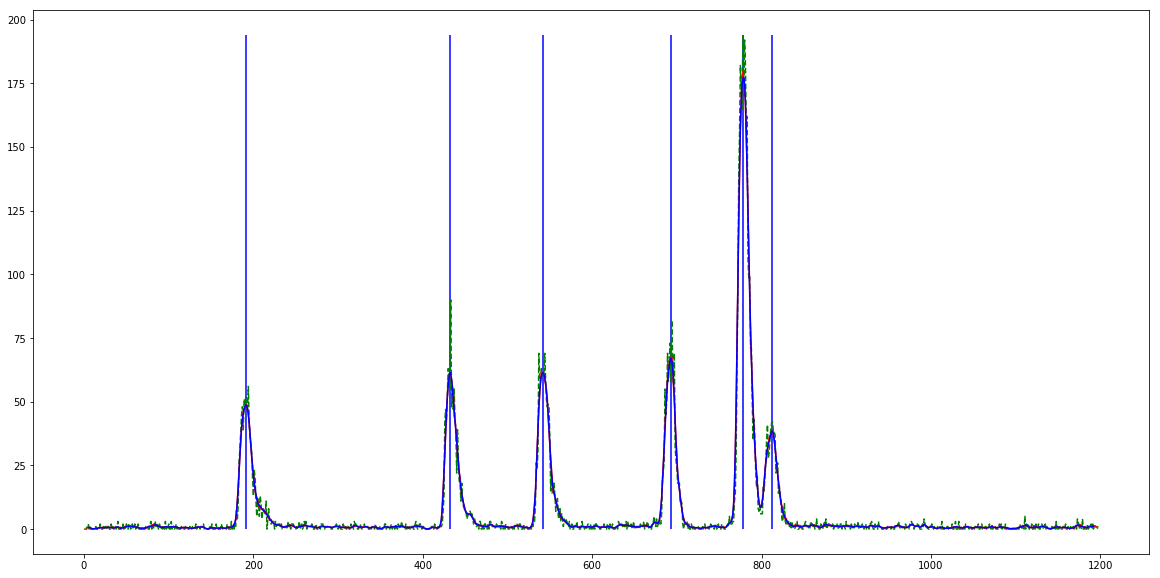

In [227]:
fig,ax=plt.subplots(figsize=(20,10))
x,y=np.loadtxt("C14_1_10Dil_ex1.csv",delimiter=",",unpack=1)
#x,y=sub(x,y,150,250)
x2,y2=box(x,y,3)
x3,y3=gbox(x,y,2)

ax.plot(x,y,'g--')
ax.plot(x2,y2,'r-')
ax.plot(x3,y3,'b-')

#peaks=find(x,y,filt=1)
#p2=find(x2,y2,filt=1)
p3=find(x3,y3,filt=0.1)
#ax.vlines(peaks,y.min(),y.max(),'g')
#ax.vlines(p2,y.min(),y.max(),colors='r')
ax.vlines(p3,y.min(),y.max(),colors='b')
print(len(p3))
plt.show()

18 99 81
81 81
21.9806439595 81.0254479718 498.280036998


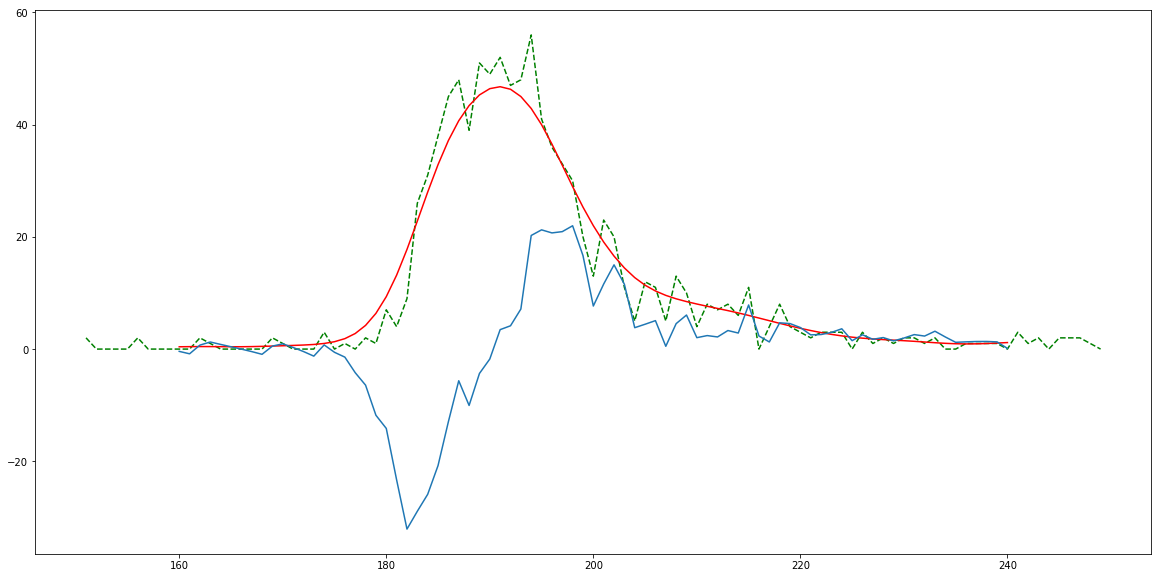

In [238]:
fig,ax=plt.subplots(figsize=(20,10))
x,y=np.loadtxt("C14_1_10Dil_ex1.csv",delimiter=",",unpack=1)
x,y=sub(x,y,150,250)
x2,y2=gbox(x,y,3)

#peaks=find(x,y,filt=1)
#p2=find(x2,y2,filt=1)
#ax.vlines(peaks,y.min(),y.max())
#ax.vlines(p2,y.min(),y.max(),colors='r')
ax.plot(x,(y),'g--')
ax.plot(x2,(y2),'r-')

k=ks(y,y2)
print(k.max(),sum(k),sum(abs(k)))
ax.plot(x2,k)
plt.show()

0.831987171757 0.31540994465


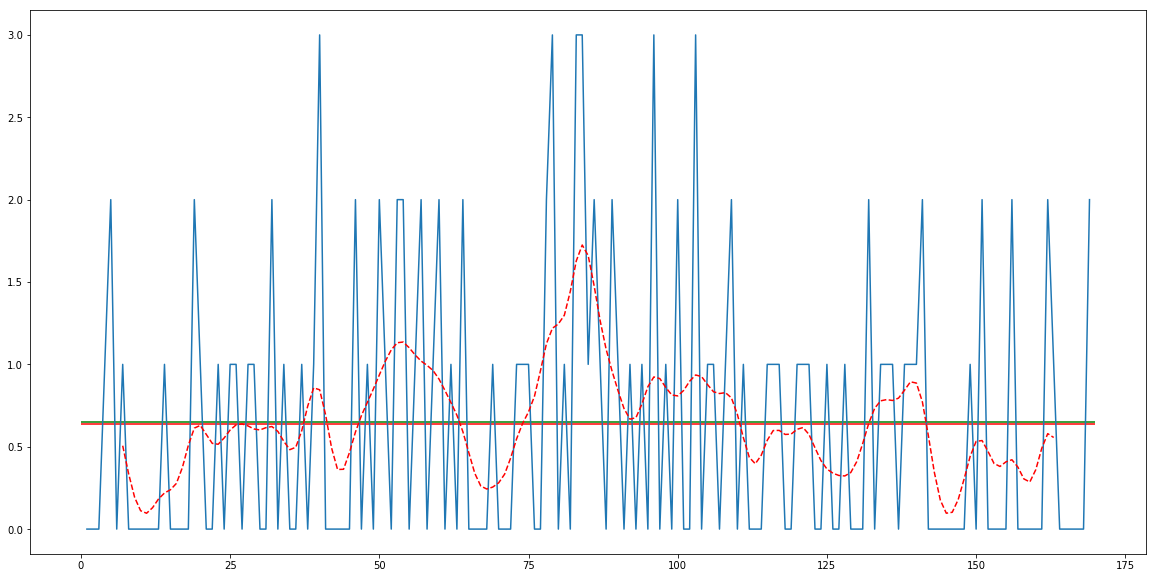

In [247]:
x,y=np.loadtxt("C14_1_10Dil_ex1.csv",delimiter=",",unpack=1)
fig,ax=plt.subplots(figsize=(20,10))
x,y=sub(x,y,0,170)
ax.plot(x,y)
x2,y2=gbox(x,y,2)
ax.plot(x2,y2,'r--')
#ax.set_xlim(250,400)
#ax.set_ylim(0,5)
ax.hlines([y.mean(),y2.mean()],0,170,colors=['r','g'])
print(y.std(),y2.std())
plt.show()

0 1.0
1 0.546591397225
2 0.429263838682
3 0.384810799083
4 0.360595754071
5 0.335271499362
6 0.313514148245


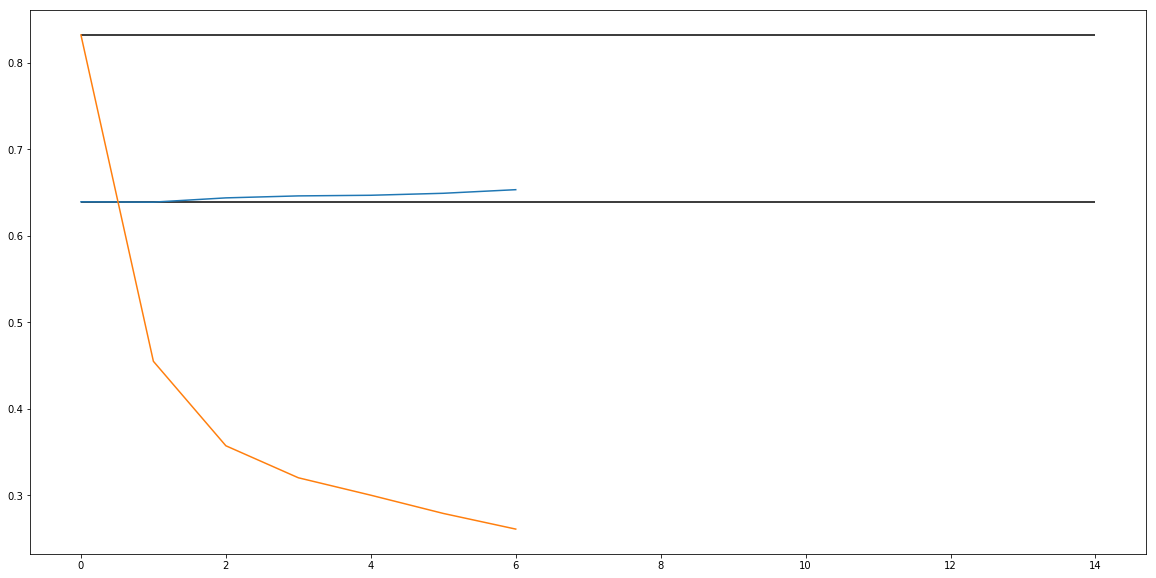

In [249]:
x,y=np.loadtxt("C14_1_10Dil_ex1.csv",delimiter=",",unpack=1)
fig,ax=plt.subplots(figsize=(20,10))
x,y=sub(x,y,0,170)
xs=[]
means,stds=[],[]
for i in range(7):
    x2,y2=box(x,y,i)
    xs.append(i)
    means.append(y2.mean())
    stds.append(y2.std())
    print(i,y2.std()/y.std())

ax.plot(xs,means)
ax.plot(xs,stds)
ax.hlines([y.mean(),y.std()],0,14)
plt.show()

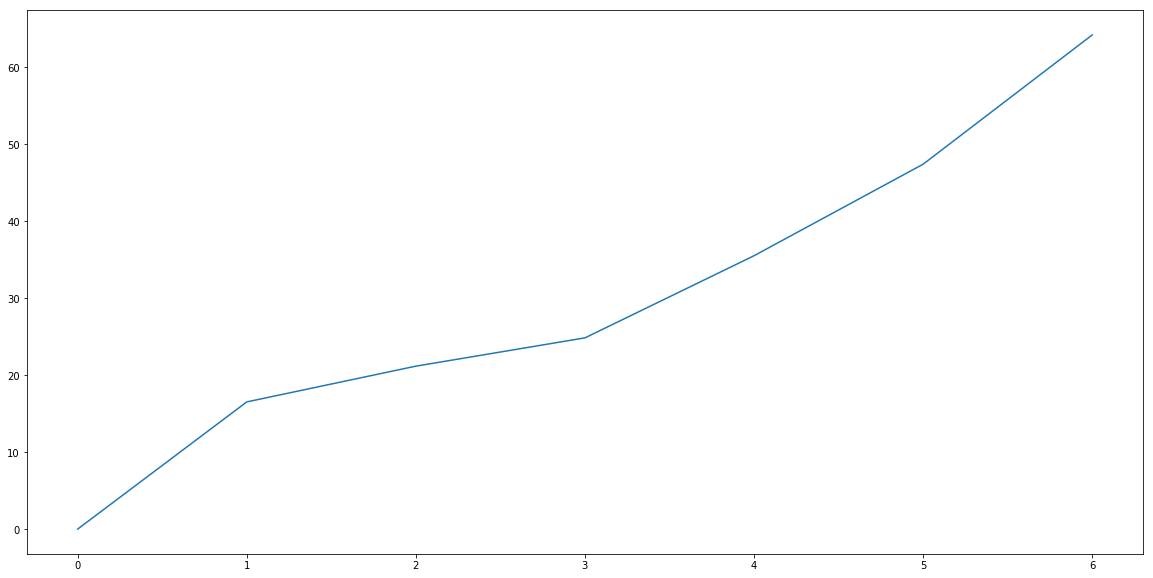

In [9]:
fig,ax=plt.subplots(figsize=(20,10))
x,y=np.loadtxt("C14_1_10Dil_ex1.csv",delimiter=",",unpack=1)
#x,y=sub(x,y,150,250)
c=[]
xs=[]
for i in range(7):
    x2,y2=box(x,y,i)
    xs.append(i)
    c.append(chi(y,y2))

ax.plot(xs,c)

plt.show()
    

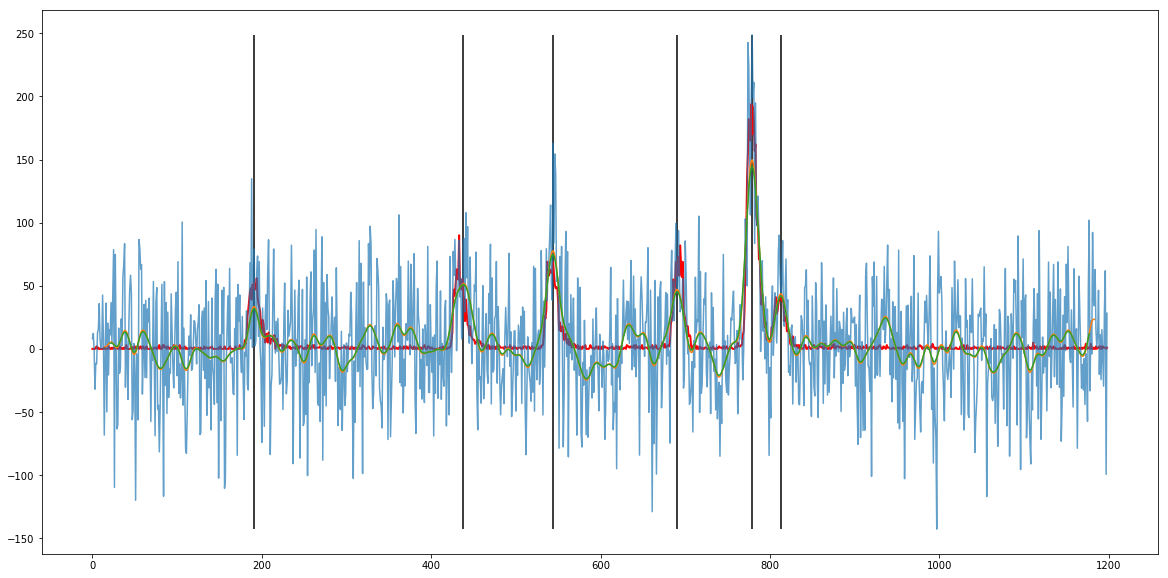

In [269]:
fig,ax=plt.subplots(figsize=(20,10))
x,y=np.loadtxt("C14_1_10Dil_ex1.csv",delimiter=",",unpack=1)
noise = np.random.normal(0,40,len(x))
ax.plot(x,y,'r',lw=2)
y=y+noise
ax.plot(x,y,alpha=0.7)
x2,y2=gbox(x,y,5)
x3,y3=gbox(x2,y2,2)
ax.plot(x2,y2)
ax.plot(x3,y3)


#peaks=find(x,y,filt=0.5)
#p2=find(x2,y2,filt=0.15)
p3=find(x3,y3,filt=0.2)
#ax.vlines(peaks,y.min(),y.max())
#ax.vlines(p2,y.min(),y.max(),colors='orange')
ax.vlines(p3,y.min(),y.max(),colors='black')

plt.show()

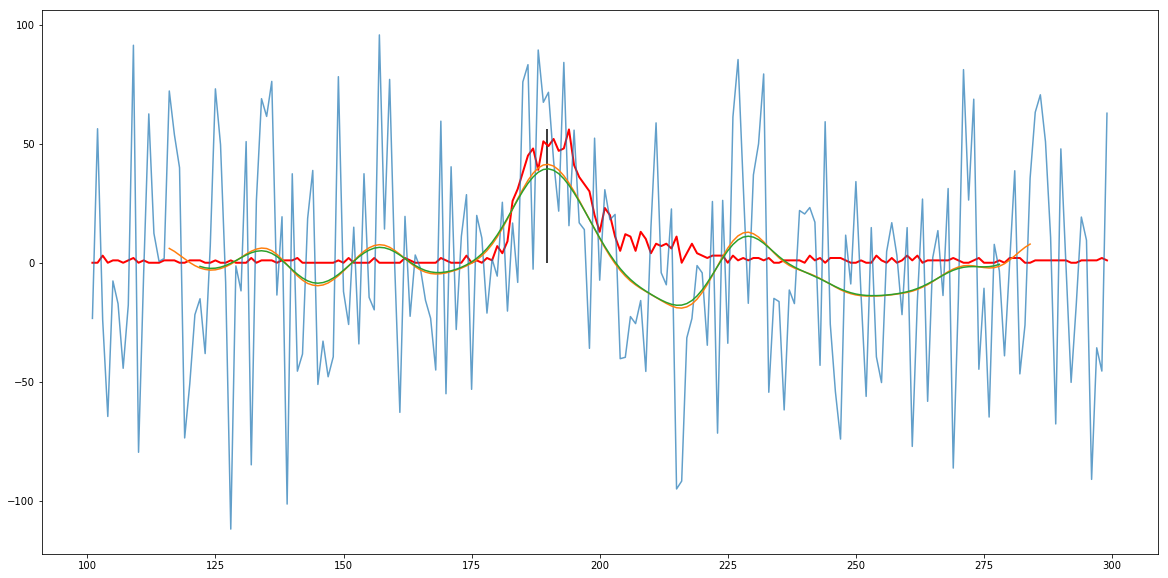

In [267]:
fig,ax=plt.subplots(figsize=(20,10))
x,y=np.loadtxt("C14_1_10Dil_ex1.csv",delimiter=",",unpack=1)

x,y=sub(x,y,100,300)
scale=40
noise = np.random.normal(0,scale,len(x))
ax.plot(x,y,'r',lw=2)
yn=y+noise
ax.plot(x,yn,alpha=0.7)
x2,y2=gbox(x,yn,5)
x3,y3=gbox(x2,y2,2)
ax.plot(x2,y2)
ax.plot(x3,y3)

#peaks=find(x,y,filt=0.5)
#p2=find(x2,y2,filt=0.15)
p3=find(x3,y3,filt=1)
#ax.vlines(peaks,y.min(),y.max())
#ax.vlines(p2,y.min(),y.max(),colors='orange')
ax.vlines(p3,y.min(),y.max(),colors='black')



plt.show()

In [294]:
def main(file,scale=0):
    x,y=np.loadtxt(file,delimiter=',',unpack=1)
    noise = np.random.normal(0,scale,len(x))
    #ax.plot(x,y,'r',lw=2)
    yn=y+noise
    
    ax.plot(x,yn,'b',alpha=0.7)
    x2,y2=gbox(x,yn,5)
    x3,y3=gbox(x2,y2,2)
    ax.plot(x2,y2)
    ax.plot(x3,y3)
    
    #peaks=find(x,y,filt=0.5)
    #p2=find(x2,y2,filt=0.15)
    p3=find(x3,y3,filt=0.1)
    #ax.vlines(peaks,y.min(),y.max())
    #ax.vlines(p2,y.min(),y.max(),colors='orange')
    ax.vlines(p3,y.min(),y.max(),colors='black')
    
    print(p3)
    

[ 191.14178142  433.23372234  542.56929569  692.35371354  778.95053951
  811.58474585]


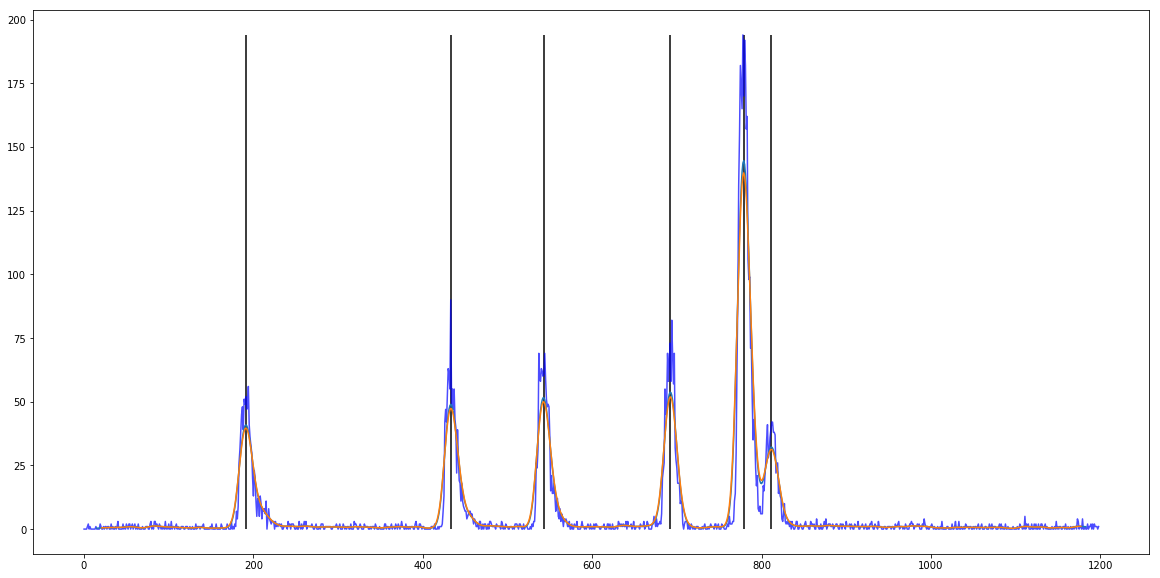

In [396]:
fig,ax=plt.subplots(figsize=(20,10))
main("C14_1_10Dil_ex1.csv")
plt.show()
 

[ 191.34444344] [ 48.71534402]
y0 = 0.821995 +- 0.198712
A = 872.463 +- 12.9189
t0 = 7.98661 +- 0.285389
xc = 185.928 +- 0.127084
w = 4.35703 +- 0.111741
Area under peak = 937.061 +- 5.79997e-07
50.4363502629


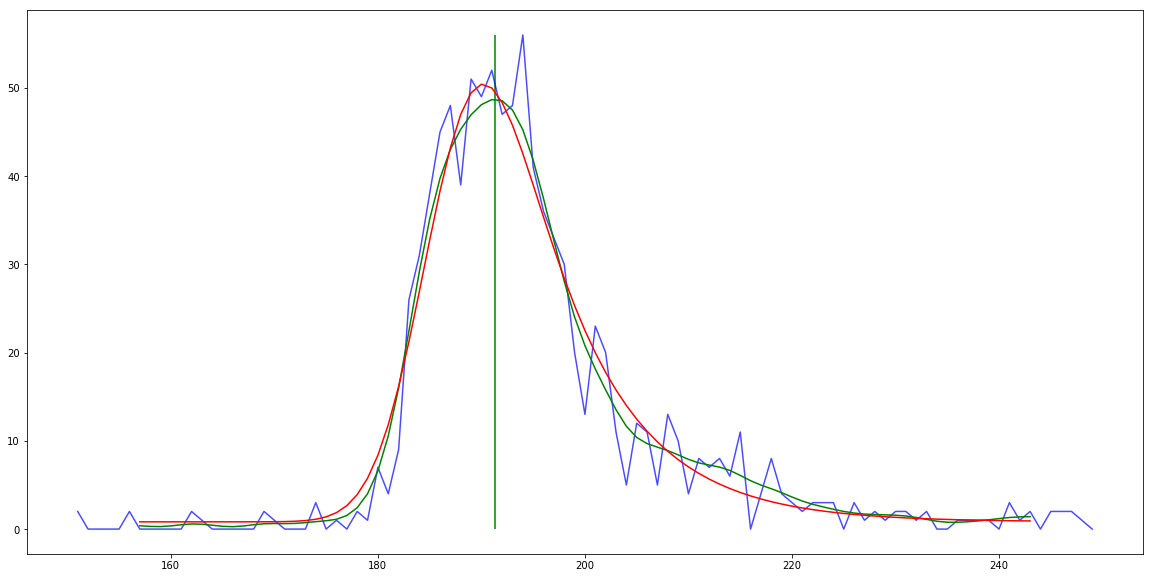

In [427]:
fig,ax=plt.subplots(figsize=(20,10))
x,y=np.loadtxt('C14_1_10Dil_ex1.csv',delimiter=',',unpack=1)
x,y=sub(x,y,150,250)

ax.plot(x,y,'b',alpha=0.7)
x2,y2=gbox(x,y,2)
#x3,y3=gbox(x2,y2,2)
ax.plot(x2,y2,'g')
#ax.plot(x3,y3)
  
#peaks=find(x,y,filt=0.5)
p2,peak=find(x2,y2,filt=0.15,find_y=1)
#p3=find(x3,y3,filt=0.1)
#ax.vlines(peaks,y.min(),y.max())
ax.vlines(p2,y.min(),y.max(),colors='green')
#ax.vlines(p3,y.min(),y.max(),colors='black')

print(p2,peak)
s=7

y0=0
A=peak
t0=1
xc=p2
w=1
args=["y0","A","t0","xc","w"]
p0=[y0,A,t0,xc,w]

xf=np.linspace(x.min(),x.max(),1000)


#yf=peak*gauss(xf,p2,s)
def yf2(xf,y0,A,t0,xc,w):
    return(y0+ (A/t0) * np.exp(((1/2)*(w/t0)**2)-((xf-xc)/t0)) * ((1/2)+(1/2)*erf((((xf-xc)/w)-(w/t0))/np.sqrt(2))))

#ax.plot(xf,yf,'r')
#ax.plot(xf,yf2(xf,*p0),'m')

popt,pcov=curve_fit(yf2,x2,y2,p0)
perr = np.sqrt(np.diag(pcov))
for i in range(len(popt)):
    print("{} = {:1g} +- {:1g}".format(args[i],popt[i],perr[i]))

ax.plot(x2,yf2(x2,*popt),'r')



print("Area under peak = {:1g} +- {:2g}".format(*quad(yf2,160,240,args=(popt[0],popt[1],popt[2],popt[3],popt[4]))))

print(yf2(xf,*popt).max())

plt.show()